In [21]:
import pandas as pd
import os 
os.getcwd()


'/Users/vinushan/Documents/Y4S2/RP module/contextawareforecastingsys/data'

In [22]:

df = pd.read_excel('fnb_dataset .xlsx')
df.head()

,SYSTEM DATE,BILL NO,PAYMENT MODE,PAYMENT DATE,ORDER TYPE,ORDER TYPE NAME,ORDER NO,TABLE NAME,DISCOUNT,DISCOUNT REMARKS,...,FOOD ID,FOOD NAME,QTY,GROSS PRICE,TOTAL DISCOUNT PRICE,SERVICE CHARGE PRICE,PACKAGE CHARGE PRICE,TOTAL PRICE,FOOD COST,PAYMENT DATE TIME
0,2025-12-21,3280,CITY LEDGER,2025-12-21,DELIVERY,NaN,7280,TBL 4,NaN,NaN,...,121.0,Deluxe Roll,1,340.33,0.00,0,0,413.15,284.47,2025-12-21 17:35:00
1,2025-05-27,1571,CASH,2025-05-27,DELIVERY,NaN,5571,TBL 7,NaN,NaN,...,103.0,Spicy Drink,1,432.67,0.00,0,0,384.21,0.00,2025-05-27 16:17:00
2,2025-01-28,5410,CARD,2025-01-28,DELIVERY,NaN,9410,TBL 3,NaN,NaN,...,126.0,Herb Burger,3,102.82,0.00,0,0,380.50,95.09,2025-01-28 11:11:00
3,2025-12-20,1243,COMPLIMENTORY,2025-12-20,DELIVERY,NaN,5243,TBL 3,0.25,Awurudu Deal,...,22.0,Deluxe Roll,3,3138.06,848.67,0,0,7716.44,0.00,2025-12-20 16:12:00
4,2025-12-18,1762,CITY LEDGER,2025-12-18,TABLE,NaN,5762,NaN,Flat,pizza deal19',...,99.0,"Deluxe Pizza 22""",1,1880.87,262.67,0,0,1294.17,0.00,2025-12-18 22:18:00


In [23]:
# Print first 5 rows with these columns only SYSTEM DATE, PAYMENT DATE, PAYMENT DATE TIME, ORDER START TIME
df[["SYSTEM DATE", "PAYMENT DATE", "PAYMENT DATE TIME", "ORDER START TIME"]].head()

,SYSTEM DATE,PAYMENT DATE,PAYMENT DATE TIME,ORDER START TIME
0,2025-12-21,2025-12-21,2025-12-21 17:35:00,Dec 21 2025 03:02PM
1,2025-05-27,2025-05-27,2025-05-27 16:17:00,May 27 2025 02:27PM
2,2025-01-28,2025-01-28,2025-01-28 11:11:00,Jan 28 2025 10:30AM
3,2025-12-20,2025-12-20,2025-12-20 16:12:00,Dec 20 2025 03:20PM
4,2025-12-18,2025-12-18,2025-12-18 22:18:00,Dec 18 2025 09:14PM


In [24]:
# print Order-level information only
df[["BILL NO", "ORDER NO", "PAYMENT MODE", "ORDER TYPE", "ORDER TYPE NAME", "TABLE NAME", "GUEST NAME"]].head()

,BILL NO,ORDER NO,PAYMENT MODE,ORDER TYPE,ORDER TYPE NAME,TABLE NAME,GUEST NAME
0,3280,7280,CITY LEDGER,DELIVERY,NaN,TBL 4,Guest2281
1,1571,5571,CASH,DELIVERY,NaN,TBL 7,Guest572
2,5410,9410,CARD,DELIVERY,NaN,TBL 3,Guest4411
3,1243,5243,COMPLIMENTORY,DELIVERY,NaN,TBL 3,Guest244
4,1762,5762,CITY LEDGER,TABLE,NaN,NaN,Guest763


In [25]:
# table name column analysis
df["TABLE NAME"].nunique()
df["TABLE NAME"].value_counts()

TABLE NAME
TBL 3     562
TBL 6     441
TBL 2     304
TBL 7     303
TBL 5     204
TBL 4     131
TBL 1     118
TBL 8      47
TBL 9      10
TBL 15      4
TBL 12      2
TBL 19      1
Name: count, dtype: int64

In [26]:
# order type name column analysis
print(df["ORDER TYPE NAME"].nunique())
print(df["ORDER TYPE NAME"].value_counts())

# check the missing values in the dataset
print(int(df['ORDER TYPE NAME'].isnull().sum()))

# print the number of rows in the table 
len(df)

2
ORDER TYPE NAME
Uber Eats    822
Pick Me      411
Name: count, dtype: int64
4424


5657

In [27]:
# ORDER TYPE columns analysis
print(df["ORDER TYPE"].nunique())
print(df["ORDER TYPE"].value_counts())

# check the missing values in the dataset
print(int(df['ORDER TYPE'].isnull().sum()))

4
ORDER TYPE
DELIVERY    2262
TABLE       2172
TAKEOUT     1216
TAB            5
Name: count, dtype: int64
2


In [28]:
# Discount-related information
df[["DISCOUNT", "DISCOUNT REMARKS"]].head()

,DISCOUNT,DISCOUNT REMARKS
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,0.25,Awurudu Deal
4,Flat,pizza deal19'


In [29]:
# Item-level information
df[["FOOD ID", "FOOD NAME", "QTY"]].head()

,FOOD ID,FOOD NAME,QTY
0,121.0,Deluxe Roll,1
1,103.0,Spicy Drink,1
2,126.0,Herb Burger,3
3,22.0,Deluxe Roll,3
4,99.0,"Deluxe Pizza 22""",1


In [30]:
# Pricing and cost information
df[["GROSS PRICE", "TOTAL DISCOUNT PRICE", "SERVICE CHARGE PRICE",
    "PACKAGE CHARGE PRICE", "TOTAL PRICE", "FOOD COST"]].head()

,GROSS PRICE,TOTAL DISCOUNT PRICE,SERVICE CHARGE PRICE,PACKAGE CHARGE PRICE,TOTAL PRICE,FOOD COST
0,340.33,0.00,0,0,413.15,284.47
1,432.67,0.00,0,0,384.21,0.00
2,102.82,0.00,0,0,380.50,95.09
3,3138.06,848.67,0,0,7716.44,0.00
4,1880.87,262.67,0,0,1294.17,0.00


## Remove the unwanted columns

In [31]:
# Columns to remove early based on your research goal:
# Your goal = sales forecasting + context-aware strategy.
# So we remove columns that are:
# 1) pure identifiers (models don’t learn patterns from them)
# 2) too sparse/incomplete (can add noise)
# 3) not directly useful for forecasting/recommendations

cols_to_drop = [
    "BILL NO",          # Identifier only. Useful for billing, not predictive for sales patterns.
    "ORDER NO",         # Identifier only. Models don’t gain forecasting signal from this.
    "GUEST NAME",       # Customer name usually not useful for demand forecasting; adds noise/privacy risk.
    "ORDER TYPE NAME",  # Too many missing values; overlaps with ORDER TYPE and can confuse models.
    "PAYMENT DATE",
    "ORDER START TIME",
    "PAYMENT DATE TIME",
    "TABLE NAME",       # Mostly operational for dine-in layout; not needed for core forecasting.
    "PAYMENT MODE",     # Often not necessary for sales forecasting; keep only if you want behavior insights.
    "SERVICE CHARGE PRICE",
    "PACKAGE CHARGE PRICE"
]

# Remove only columns that actually exist in your df (safe approach)
cols_to_drop = [c for c in cols_to_drop if c in df.columns]

df = df.drop(columns=cols_to_drop)

print("Dropped columns:", cols_to_drop)
print("Remaining columns:", list(df.columns))


Dropped columns: ['BILL NO', 'ORDER NO', 'GUEST NAME', 'ORDER TYPE NAME', 'PAYMENT DATE', 'ORDER START TIME', 'PAYMENT DATE TIME', 'TABLE NAME', 'PAYMENT MODE', 'SERVICE CHARGE PRICE', 'PACKAGE CHARGE PRICE']
Remaining columns: ['SYSTEM DATE', 'ORDER TYPE', 'DISCOUNT', 'DISCOUNT REMARKS', 'FOOD ID', 'FOOD NAME', 'QTY', 'GROSS PRICE', 'TOTAL DISCOUNT PRICE', 'TOTAL PRICE', 'FOOD COST']


In [32]:
# count all the element in this variable cols_to_drop
print("Number of columns to drop:", len(cols_to_drop))
print("Remaining columns", len(list(df.columns)))

Number of columns to drop: 11
Remaining columns 11


## Reorder the columns for easiness

In [33]:
new_order = [
    "SYSTEM DATE",
    
    "ORDER TYPE",
    "DISCOUNT",
    "DISCOUNT REMARKS",
    
    "FOOD ID",
    "FOOD NAME",
    "QTY",
    
    "GROSS PRICE",
    "TOTAL DISCOUNT PRICE",
    "TOTAL PRICE",
    "FOOD COST"
]

df1 = df[new_order]

print("New column order applied:")
print(list(df1.columns))
df.head()

New column order applied:
['SYSTEM DATE', 'ORDER TYPE', 'DISCOUNT', 'DISCOUNT REMARKS', 'FOOD ID', 'FOOD NAME', 'QTY', 'GROSS PRICE', 'TOTAL DISCOUNT PRICE', 'TOTAL PRICE', 'FOOD COST']


,SYSTEM DATE,ORDER TYPE,DISCOUNT,DISCOUNT REMARKS,FOOD ID,FOOD NAME,QTY,GROSS PRICE,TOTAL DISCOUNT PRICE,TOTAL PRICE,FOOD COST
0,2025-12-21,DELIVERY,NaN,NaN,121.0,Deluxe Roll,1,340.33,0.00,413.15,284.47
1,2025-05-27,DELIVERY,NaN,NaN,103.0,Spicy Drink,1,432.67,0.00,384.21,0.00
2,2025-01-28,DELIVERY,NaN,NaN,126.0,Herb Burger,3,102.82,0.00,380.50,95.09
3,2025-12-20,DELIVERY,0.25,Awurudu Deal,22.0,Deluxe Roll,3,3138.06,848.67,7716.44,0.00
4,2025-12-18,TABLE,Flat,pizza deal19',99.0,"Deluxe Pizza 22""",1,1880.87,262.67,1294.17,0.00


In [34]:
# find all the missing values in the dataset
missing_values = df1.isnull().sum()
print("Missing values in each column:")
print(missing_values)   

Missing values in each column:
SYSTEM DATE                0
ORDER TYPE                 2
DISCOUNT                4165
DISCOUNT REMARKS        4727
FOOD ID                    2
FOOD NAME                  0
QTY                        0
GROSS PRICE                0
TOTAL DISCOUNT PRICE       0
TOTAL PRICE                0
FOOD COST                  0
dtype: int64


## Fix data types

In [35]:
# count each unique value in ORDER TYPE column
df1["ORDER TYPE"].value_counts()
df1["ORDER TYPE"].head(10)

0    DELIVERY
1    DELIVERY
2    DELIVERY
3    DELIVERY
4       TABLE
5    DELIVERY
6    DELIVERY
7     TAKEOUT
8    DELIVERY
9     TAKEOUT
Name: ORDER TYPE, dtype: object

In [36]:
import pandas as pd
import numpy as np

# 1) Ensure date is correct
df1["SYSTEM DATE"] = pd.to_datetime(df1["SYSTEM DATE"], errors="coerce")

In [37]:
# 2) Clean ORDER TYPE convert it as string, strip whitespace, and convert to uppercase
df1["ORDER TYPE"] = df1["ORDER TYPE"].astype(str).str.strip().str.upper()


In [38]:
df1["FOOD ID"].unique()

df1["FOOD ID"].nunique()

150

In [39]:
# 3) FOOD ID: make it clean integer-like (if possible)
df1["FOOD ID"] = pd.to_numeric(df1["FOOD ID"], errors="coerce")

In [40]:
# 4) Quantity
df1["QTY"] = pd.to_numeric(df1["QTY"], errors="coerce").fillna(0).astype(int)

# 5) Prices/cost
price_cols = [
    "GROSS PRICE", "TOTAL DISCOUNT PRICE", "TOTAL PRICE", "FOOD COST"
]
for c in price_cols:
    df1[c] = pd.to_numeric(df[c], errors="coerce")

# 6) DISCOUNT (keep as text for now, we’ll normalize next)
df1["DISCOUNT"] = df1["DISCOUNT"].astype(str).str.strip()
df1["DISCOUNT REMARKS"] = df1["DISCOUNT REMARKS"].astype(str).str.strip()

In [41]:
df1.head()

,SYSTEM DATE,ORDER TYPE,DISCOUNT,DISCOUNT REMARKS,FOOD ID,FOOD NAME,QTY,GROSS PRICE,TOTAL DISCOUNT PRICE,TOTAL PRICE,FOOD COST
0,2025-12-21,DELIVERY,nan,nan,121.0,Deluxe Roll,1,340.33,0.00,413.15,284.47
1,2025-05-27,DELIVERY,nan,nan,103.0,Spicy Drink,1,432.67,0.00,384.21,0.00
2,2025-01-28,DELIVERY,nan,nan,126.0,Herb Burger,3,102.82,0.00,380.50,95.09
3,2025-12-20,DELIVERY,0.25,Awurudu Deal,22.0,Deluxe Roll,3,3138.06,848.67,7716.44,0.00
4,2025-12-18,TABLE,Flat,pizza deal19',99.0,"Deluxe Pizza 22""",1,1880.87,262.67,1294.17,0.00


## Check for missing values after all the cleaning.

In [42]:
df1.isna().sum()

SYSTEM DATE             0
ORDER TYPE              0
DISCOUNT                0
DISCOUNT REMARKS        0
FOOD ID                 2
FOOD NAME               0
QTY                     0
GROSS PRICE             0
TOTAL DISCOUNT PRICE    0
TOTAL PRICE             0
FOOD COST               0
dtype: int64

### clean the food id

In [43]:
df[df["FOOD ID"].isna()]

,SYSTEM DATE,ORDER TYPE,DISCOUNT,DISCOUNT REMARKS,FOOD ID,FOOD NAME,QTY,GROSS PRICE,TOTAL DISCOUNT PRICE,TOTAL PRICE,FOOD COST
291,2025-02-07,TABLE,NaN,NaN,NaN,Zesty Pizza,1,115.02,39.03,93.57,0.00
4486,2025-04-05,TABLE,NaN,NaN,NaN,Herb Burger,2,123639.03,0.00,216520.95,1721.03


In [44]:
df[df["FOOD NAME"] == "Zesty Pizza"][["FOOD NAME", "FOOD ID"]].head()

,FOOD NAME,FOOD ID
238,Zesty Pizza,18.0
291,Zesty Pizza,NaN
367,Zesty Pizza,18.0
387,Zesty Pizza,100.0
711,Zesty Pizza,22.0


In [45]:
df[df["FOOD NAME"] == "Herb Burger"][["FOOD NAME", "FOOD ID"]].head()


,FOOD NAME,FOOD ID
2,Herb Burger,126.0
7,Herb Burger,34.0
24,Herb Burger,107.0
25,Herb Burger,22.0
64,Herb Burger,35.0


### removing the food id because it is not unique and internally one product has multiple ids.

In [46]:
df2 = df1.drop(columns=["FOOD ID"])

In [48]:
df2.columns

Index(['SYSTEM DATE', 'ORDER TYPE', 'DISCOUNT', 'DISCOUNT REMARKS',
       'FOOD NAME', 'QTY', 'GROSS PRICE', 'TOTAL DISCOUNT PRICE',
       'TOTAL PRICE', 'FOOD COST'],
      dtype='object')

## Cleaning the system date column 

In [54]:
df2["SYSTEM DATE"] = pd.to_datetime(df2["SYSTEM DATE"], errors="coerce")


In [55]:
df2["SYSTEM DATE"].dtype

dtype('<M8[ns]')

In [56]:
df2["SYSTEM DATE"].isna().sum()

np.int64(0)

In [57]:
df2["SYSTEM DATE"].min(), df2["SYSTEM DATE"].max()

(Timestamp('2025-01-01 00:00:00'), Timestamp('2025-12-28 00:00:00'))

In [58]:
## remove all the rows after date 2025-09-10    
df3 = df2[df2["SYSTEM DATE"] <= "2025-09-10"]

In [59]:
df3["SYSTEM DATE"].min(), df3["SYSTEM DATE"].max()

(Timestamp('2025-01-01 00:00:00'), Timestamp('2025-09-10 00:00:00'))

In [61]:
df3 = df3.sort_values("SYSTEM DATE").reset_index(drop=True)

In [64]:
print(df3["SYSTEM DATE"].dtype)
print(df3["SYSTEM DATE"].isna().sum())
print(df3[["SYSTEM DATE"]].head())
print(df3[["SYSTEM DATE"]].tail())

datetime64[ns]
0
  SYSTEM DATE
0  2025-01-01
1  2025-01-01
2  2025-01-01
3  2025-01-01
4  2025-01-01
     SYSTEM DATE
3952  2025-09-10
3953  2025-09-10
3954  2025-09-10
3955  2025-09-10
3956  2025-09-10


In [66]:
# print the rows and columns in the df3
print(df3.shape)

(3957, 10)


In [67]:
# rename all the column with lower case
df3.columns = [col.lower() for col in df3.columns]

In [70]:
df3["order type"].unique()


array(['DELIVERY', 'TAKEOUT', 'TABLE', 'NAN', 'TAB'], dtype=object)

In [71]:
df3["order type"].head()

0    DELIVERY
1    DELIVERY
2     TAKEOUT
3    DELIVERY
4     TAKEOUT
Name: order type, dtype: object

In [ ]:
df["ORDER TYPE"].isna().sum()


In [ ]:
# rename the columns to snake case

df3 = df3.rename(columns={
    "system date": "system_date",
    "order type": "order_type",
    "discount": "discount",
    "discount remarks": "discount_remarks",
    "food name": "food_name",
    "qty": "qty",
    "gross price": "gross_price",
    "total discount price": "total_discount_price",
    "total price": "total_price",
    "food cost": "food_cost"
})


## Cleaning the ORDER TYPE

In [74]:
df3["order_type"].unique()


array(['DELIVERY', 'TAKEOUT', 'TABLE', 'NAN', 'TAB'], dtype=object)

In [75]:
df3["order_type"] = df3["order_type"].astype(str)

In [76]:
df3["order_type"] = df3["order_type"].str.strip()

In [77]:
df3["order_type"] = df3["order_type"].str.lower()

In [78]:
# fix known bad categories
df3["order_type"] = df3["order_type"].replace({
    "nan": pd.NA,
    "tab": "table"
})

In [82]:
df3["order_type"].unique()

array(['delivery', 'takeaway', 'table', <NA>], dtype=object)

In [80]:
df3["order_type"].isna().sum()

np.int64(2)

In [81]:
# convert takeout to takeaway - standard

df3["order_type"] = df3["order_type"].replace({
        "takeout" : "takeaway"
    }
)

In [83]:
df3.columns

Index(['system_date', 'order_type', 'discount', 'discount_remarks',
       'food_name', 'qty', 'gross_price', 'total_discount_price',
       'total_price', 'food_cost'],
      dtype='object')

## Cleaning the Discount columns

In [85]:
df3["discount"].unique()

array(['nan', 'Flat', '0.2', '0.25', '0.5', '0.3', '0.15'], dtype=object)

In [88]:
df3["discount"] = df3["discount"].astype(str)

In [89]:
df3["discount"] = df3["discount"].str.strip().str.lower()

In [90]:
df3["discount"].unique()

array(['nan', 'flat', '0.2', '0.25', '0.5', '0.3', '0.15'], dtype=object)

In [93]:
# make everything string
df3["discount"] = df3["discount"].astype(str)

# strip spaces and lowercase
df3["discount"] = df3["discount"].str.strip().str.lower()

# turn fake-missing into real missing
df3.loc[df3["discount"].isin(["nan", "none", "null", "", "na"]), "discount"] = pd.NA


In [94]:
df3["discount_rate"] = pd.to_numeric(df3["discount"], errors="coerce")

In [96]:
df3["discount"] = df3["discount"].astype(str).str.strip().str.lower()
df3.loc[df3["discount"].isin(["nan", "none", "null", "", "na"]), "discount"] = pd.NA

In [97]:
df3["discount_rate"] = pd.to_numeric(df3["discount"], errors="coerce")

In [101]:
df3 = df3.drop(columns=["discount"])


In [102]:
df3["discount_rate"].unique()

array([ nan, 0.2 , 0.25, 0.5 , 0.3 , 0.15])

In [103]:
df3.columns

Index(['system_date', 'order_type', 'discount_remarks', 'food_name', 'qty',
       'gross_price', 'total_discount_price', 'total_price', 'food_cost',
       'discount_rate'],
      dtype='object')

## Cleaning the food_name

In [104]:
df3.columns

Index(['system_date', 'order_type', 'discount_remarks', 'food_name', 'qty',
       'gross_price', 'total_discount_price', 'total_price', 'food_cost',
       'discount_rate'],
      dtype='object')

In [106]:
df3["food_name"].unique()

array([<NA>, 'Veggie Roll', 'Deluxe Pizza 19"', 'Sweet Chicken 19"',
       'Veggie Roll 9"', 'Spicy Chicken 19"', 'Herb Dessert 19"',
       'Spicy Burger', 'Herb Drink 9"', 'Crispy Pasta 12"',
       'Crispy Drink', 'Crispy Dessert 9"', 'Deluxe Dessert 19"',
       'Deluxe Pizza', 'Herb Pasta 9"', 'Classic Pasta 22"',
       'Deluxe Pasta 12"', 'Veggie Burger', 'Crispy Sandwich 12"',
       'Spicy Burger 12"', 'Zesty Burger 22"', 'Spicy Chicken 9"',
       'Veggie Dessert 12"', 'Classic Chicken', 'Sweet Chicken 12"',
       'Spicy Drink', 'Zesty Roll', 'Zesty Pizza', 'Veggie Drink 12"',
       'Sweet Burger 12"', 'Spicy Drink 22"', 'Classic Drink',
       'Classic Pasta 19"', 'Herb Burger', 'Spicy Pizza',
       'Veggie Pasta 19"', 'Sweet Burger 22"', 'Herb Sandwich 9"',
       'Deluxe Roll', 'Herb Burger 12"', 'Crispy Pasta 22"',
       'Classic Chicken 19"', 'Spicy Burger 9"', 'Veggie Dessert 9"',
       'Zesty Burger', 'Spicy Burger 19"', 'Spicy Sandwich 19"', 'Item50',
       'Sp

In [107]:
df3["food_name"] = df3["food_name"].astype(str)

In [108]:
df3["food_name"] = df3["food_name"].str.strip()

In [109]:
df3.loc[df3["food_name"].isin(["nan", "none", "null", ""]), "food_name"] = pd.NA

In [113]:
df3["food_name"].unique()

array(['<NA>', 'Veggie Roll', 'Deluxe Pizza 19"', 'Sweet Chicken 19"',
       'Veggie Roll 9"', 'Spicy Chicken 19"', 'Herb Dessert 19"',
       'Spicy Burger', 'Herb Drink 9"', 'Crispy Pasta 12"',
       'Crispy Drink', 'Crispy Dessert 9"', 'Deluxe Dessert 19"',
       'Deluxe Pizza', 'Herb Pasta 9"', 'Classic Pasta 22"',
       'Deluxe Pasta 12"', 'Veggie Burger', 'Crispy Sandwich 12"',
       'Spicy Burger 12"', 'Zesty Burger 22"', 'Spicy Chicken 9"',
       'Veggie Dessert 12"', 'Classic Chicken', 'Sweet Chicken 12"',
       'Spicy Drink', 'Zesty Roll', 'Zesty Pizza', 'Veggie Drink 12"',
       'Sweet Burger 12"', 'Spicy Drink 22"', 'Classic Drink',
       'Classic Pasta 19"', 'Herb Burger', 'Spicy Pizza',
       'Veggie Pasta 19"', 'Sweet Burger 22"', 'Herb Sandwich 9"',
       'Deluxe Roll', 'Herb Burger 12"', 'Crispy Pasta 22"',
       'Classic Chicken 19"', 'Spicy Burger 9"', 'Veggie Dessert 9"',
       'Zesty Burger', 'Spicy Burger 19"', 'Spicy Sandwich 19"', 'Item50',
       '

In [114]:
df3["food_name"].isna().sum()

np.int64(0)

## Cleaning the qty

In [116]:
df3["qty"].nunique()

12

In [118]:
df3["qty"].unique()

array([nan,  3.,  4.,  2.,  1.,  5., 12.,  6., 24., 26.,  8.,  7., 15.])

In [119]:
df3["qty"].dtype

dtype('float64')

In [120]:
df3["qty"].isna().sum()

np.int64(2929)

In [121]:
df3["qty"] = pd.to_numeric(df3["qty"], errors="coerce")

In [122]:
df3["qty"] = df3["qty"].clip(lower=0)

In [124]:
df3["qty"] = df3["qty"].fillna(0)

In [125]:
df3["qty"] = df3["qty"].astype(int)

In [126]:
df3["qty"].unique()[:20]

array([ 0,  3,  4,  2,  1,  5, 12,  6, 24, 26,  8,  7, 15])

## Cleaning the gross_price

In [129]:
print(df3["gross_price"].dtype)
print(df3["gross_price"].unique()[:20])

float64
[     nan  1568.42   393.44 10601.82  1540.33  2264.26  4218.34  3479.59
  2166.1    532.67  4354.15  2377.13   190.21   391.62  2594.56  2572.84
  2311.96    70.98  1881.64   363.83]


In [130]:
print("missing values", df3["gross_price"].isna().sum())
print(df3["gross_price"].describe())

missing values 2929
count      1028.000000
mean       2969.038152
std        7375.548107
min          46.780000
25%        1337.707500
50%        2300.795000
75%        3381.990000
max      187395.260000
Name: gross_price, dtype: float64


In [131]:
df3["gross_price"] = pd.to_numeric(df3["gross_price"], errors="coerce")

In [132]:
df3["gross_price"] = df3["gross_price"].fillna(0)

In [133]:
df3["gross_price"] = df3["gross_price"].clip(lower=0)

In [134]:
df3[df3["gross_price"] == 187395.260000]

,system_date,order_type,discount_remarks,food_name,qty,gross_price,total_discount_price,total_price,food_cost,discount_rate
444,2025-01-28,delivery,nan,"Spicy Sandwich 19""",12,187395.26,133417.59,2310206.77,0.0,NaN


In [135]:
df3.columns

Index(['system_date', 'order_type', 'discount_remarks', 'food_name', 'qty',
       'gross_price', 'total_discount_price', 'total_price', 'food_cost',
       'discount_rate'],
      dtype='object')

## Cleaning the total_discount_price

In [136]:
df3["total_discount_price"].dtype

dtype('float64')

In [141]:
df3["total_discount_price"].nunique()

1027

In [142]:
df3["total_discount_price"].isna().sum()

np.int64(2929)

In [143]:
df3["total_discount_price"].describe()

count      1028.000000
mean        991.635944
std        6021.661915
min           3.910000
25%         249.110000
50%         512.055000
75%         938.035000
max      138374.330000
Name: total_discount_price, dtype: float64

In [144]:
df3["total_discount_price"] = pd.to_numeric(df3["total_discount_price"], errors="coerce")

In [145]:
df3["total_discount_price"] = df3["total_discount_price"].fillna(0)

In [146]:
df3["total_discount_price"] = df3["total_discount_price"].clip(lower=0)

In [147]:
df3[df3["total_price"] > df3["gross_price"]]

,system_date,order_type,discount_remarks,food_name,qty,gross_price,total_discount_price,total_price,food_cost,discount_rate
1,2025-01-01,delivery,nan,Veggie Roll,3,1568.42,206.74,4109.78,245.94,NaN
4,2025-01-01,takeaway,nan,"Deluxe Pizza 19""",4,393.44,64.81,1209.33,0.00,0.20
10,2025-01-01,takeaway,nan,"Sweet Chicken 19""",2,10601.82,1016.21,16737.15,0.00,NaN
16,2025-01-02,table,Awurudu Deal,"Spicy Chicken 19""",3,2264.26,1006.74,7343.31,0.00,0.25
32,2025-01-03,table,nan,Spicy Burger,5,3479.59,675.75,13609.42,0.00,NaN
...,...,...,...,...,...,...,...,...,...,...
3925,2025-09-08,delivery,Awurudu Deal,Item50,2,4821.41,601.24,9688.36,0.00,0.25
3927,2025-09-08,table,Buy 1 Get 1 Free,Deluxe Chicken,2,2732.61,900.21,5820.64,0.00,NaN
3930,2025-09-08,delivery,nan,"Herb Pasta 9""",5,1830.70,605.51,8846.25,0.00,0.25
3931,2025-09-08,delivery,nan,"Veggie Dessert 12""",2,2952.30,596.67,6678.62,0.00,NaN


In [148]:
mask = df3["total_price"] > df3["gross_price"]

df3.loc[mask, "total_price"] = (
    df3.loc[mask, "gross_price"] - df3.loc[mask, "total_discount_price"]
)

In [149]:
df3["total_price"] = df3["total_price"].clip(lower=0)

In [150]:
df3[df3["total_price"] > df3["gross_price"]]

,system_date,order_type,discount_remarks,food_name,qty,gross_price,total_discount_price,total_price,food_cost,discount_rate


## Cleaning the total_price

In [151]:
df3.columns

Index(['system_date', 'order_type', 'discount_remarks', 'food_name', 'qty',
       'gross_price', 'total_discount_price', 'total_price', 'food_cost',
       'discount_rate'],
      dtype='object')

In [152]:
df3["total_price"] = pd.to_numeric(df3["total_price"], errors="coerce")

In [153]:
print(df3["gross_price"].unique()[:20])

[    0.    1568.42   393.44 10601.82  1540.33  2264.26  4218.34  3479.59
  2166.1    532.67  4354.15  2377.13   190.21   391.62  2594.56  2572.84
  2311.96    70.98  1881.64   363.83]


In [154]:
df3["total_price"].isnull().sum()

np.int64(2929)

In [155]:
df3.shape

(3957, 10)

## Cleaning the food_cost

In [156]:
print(df3["food_cost"].dtype)
print(df3["food_cost"].unique()[:20])
print(df3["food_cost"].isna().sum())
print(df3["food_cost"].describe())

float64
[    nan  245.94    0.    382.13  460.67  126.85  563.02  646.16   59.51
  456.79  183.5   231.81  817.53 1041.14  404.81  300.6   239.49  208.85
  196.48  262.19]
2929
count     1028.000000
mean        83.253346
std       2019.987249
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      64699.860000
Name: food_cost, dtype: float64


In [157]:
# remove the food_cost
df3 = df3.drop(columns=["food_cost"])

## Remove all invalid sales rows

In [158]:
df_sales = df3[
    (df3["qty"] > 0) &
    (df3["total_price"] > 0) &
    (df3["gross_price"] > 0)
]

In [159]:
df_sales.shape

(1021, 9)

In [166]:
df_sales["total_price"].isna().sum()

np.int64(0)

In [167]:
df_sales.columns

Index(['system_date', 'order_type', 'discount_remarks', 'food_name', 'qty',
       'gross_price', 'total_discount_price', 'total_price', 'discount_rate'],
      dtype='object')

In [170]:
# remove discount_remarks
df_sales = df_sales.drop(columns=["discount_remarks"])



In [172]:
df_sales.columns

Index(['system_date', 'order_type', 'food_name', 'qty', 'gross_price',
       'total_discount_price', 'total_price', 'discount_rate'],
      dtype='object')

In [176]:
print(df_sales.shape)
print(df_sales.head())
print(df_sales.tail())
print(df_sales.sample(10))

(1021, 8)
  system_date order_type          food_name  qty  gross_price  \
0  2025-01-01   delivery        Veggie Roll    3      1568.42   
1  2025-01-01   takeaway   Deluxe Pizza 19"    4       393.44   
2  2025-01-01   takeaway  Sweet Chicken 19"    2     10601.82   
3  2025-01-01   takeaway     Veggie Roll 9"    1      1540.33   
4  2025-01-02      table  Spicy Chicken 19"    3      2264.26   

   total_discount_price  total_price  discount_rate  
0                206.74      1361.68            NaN  
1                 64.81       328.63           0.20  
2               1016.21      9585.61            NaN  
3                217.19      1235.51           0.25  
4               1006.74      1257.52           0.25  
     system_date order_type           food_name  qty  gross_price  \
1016  2025-09-08      table      Deluxe Chicken    2      2732.61   
1017  2025-09-08   delivery       Herb Pasta 9"    5      1830.70   
1018  2025-09-08   delivery  Veggie Dessert 12"    2      2952.30   

In [177]:
df_sales.isna().sum()

system_date               0
order_type                0
food_name                 0
qty                       0
gross_price               0
total_discount_price      0
total_price               0
discount_rate           570
dtype: int64

In [178]:
df_sales["qty"].describe()

count    1021.000000
mean        2.513222
std         1.709567
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        26.000000
Name: qty, dtype: float64

In [179]:
df_sales.duplicated().sum()

np.int64(0)

<Axes: >

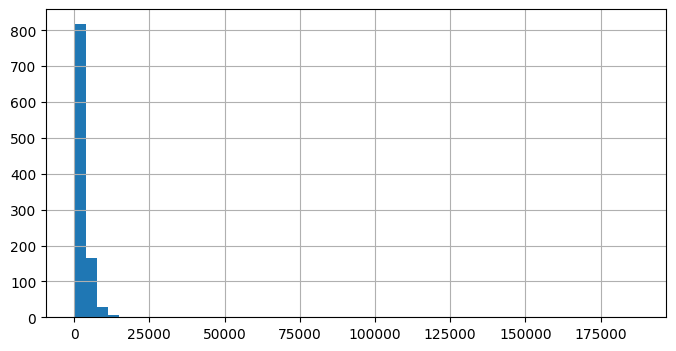

In [180]:
df_sales["gross_price"].hist(bins=50, figsize=(8,4))

<Axes: >

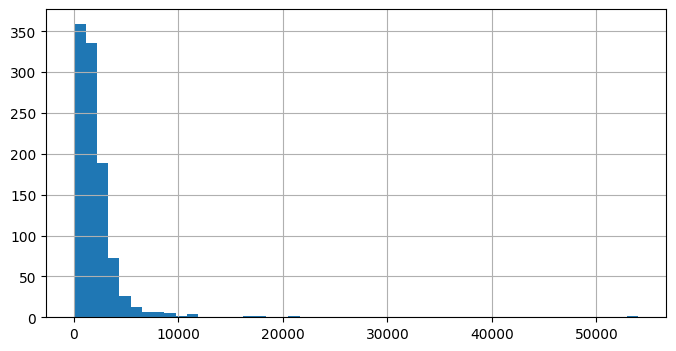

In [181]:
df_sales["total_price"].hist(bins=50, figsize=(8,4))

<Axes: xlabel='qty'>

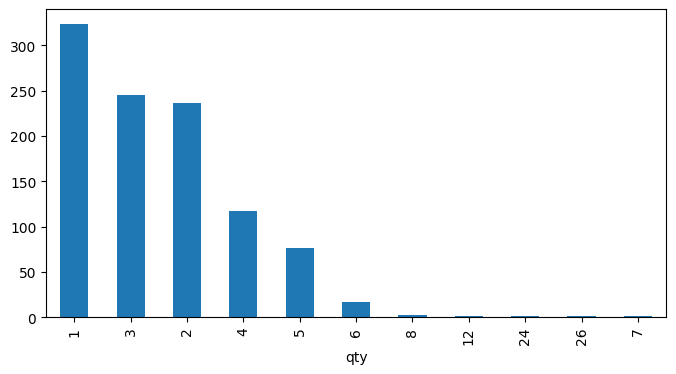

In [182]:
df_sales["qty"].value_counts().plot(kind="bar", figsize=(8,4))

<Axes: xlabel='qty'>

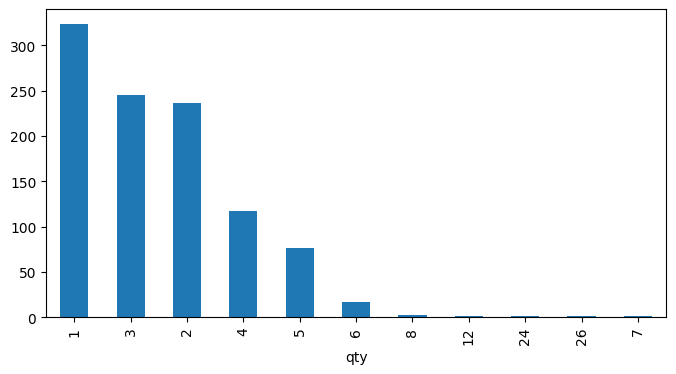

In [183]:
df_sales["qty"].value_counts().plot(kind="bar", figsize=(8,4))

<Axes: xlabel='gross_price', ylabel='total_price'>

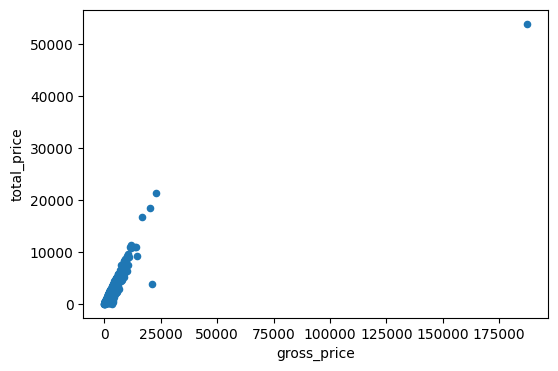

In [184]:
df_sales.plot(x="gross_price", y="total_price", kind="scatter", figsize=(6,4))

<Axes: xlabel='system_date'>

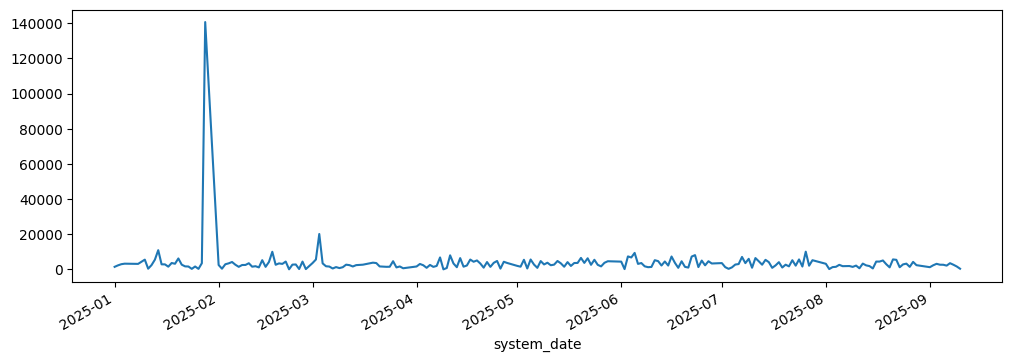

In [185]:
df_sales.groupby("system_date")["total_discount_price"].sum().plot(figsize=(12,4))

<Axes: xlabel='system_date'>

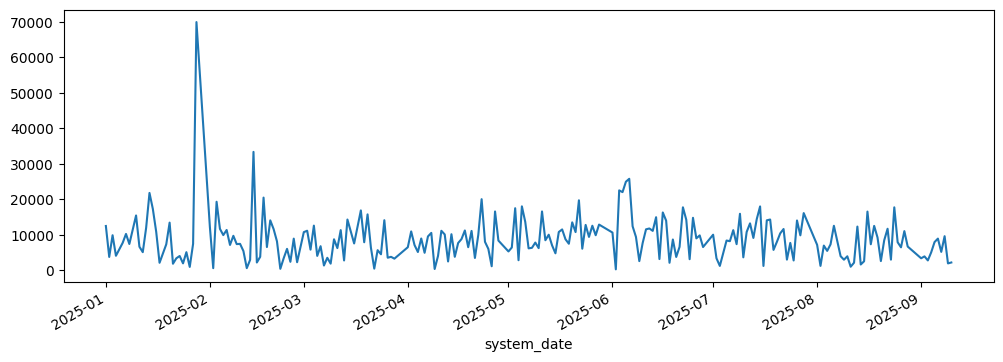

In [ ]:
# Visualize daily revenue (preview of forecasting dataset)

df_sales.groupby("system_date")["total_price"].sum().plot(figsize=(12,4))

In [196]:
# save this data frame as cleaned_sales_data.csv
df_sales.to_csv("cleaned_sales_data.csv", index=False)

In [189]:
# total_price columns values has to be 2 decimal places
df_sales["total_price"] = df_sales["total_price"].round(2)

In [191]:
# food name has additional double quotes at last so remove that.
df_sales["food_name"] = df_sales["food_name"].str.replace('"', '', regex=False)

In [193]:
# column discount_rate has to fill null value with 0
df_sales["discount_rate"] = df_sales["discount_rate"].fillna(0)

In [195]:
# rearrange columns based on the logic you know 
new_order = [
    "system_date",
    "order_type",
    "food_name",
    "qty",
    "gross_price",
     "discount_rate",
    "total_discount_price",
    "total_price"
]

df_sales = df_sales[new_order]